   ## Project 1: Movie Madness

Please fill out:
* Student name: Peter Burton 
* Student pace: full time
* Scheduled project review date/time: 6/5/22
* Instructor name: 
* Blog post URL:


## Importing any Libraries We Need

In [219]:
import pandas as pd
import sqlite3
import zipfile
import matplotlib.pyplot as plt

## Unzipping and seeing what tables we have in the IMDB data

In [220]:
import zipfile
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    zipObj.extractall(path='./zippedData/')
con = sqlite3.connect('./zippedData/im.db')
mycur = con.cursor() 
mycur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
available_table=(mycur.fetchall())
available_table


[('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_basics',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

## Creating a Panda Data Frame and looking at the general movie info

In [221]:
df_movie_basics = pd.read_sql_query("Select * from movie_basics", con)
df_movie_basics['movie_id']= df_movie_basics['movie_id'].apply(str)
df_movie_basics['primary_title']= df_movie_basics['primary_title'].apply(str)
df_movie_basics.dropna(subset=['original_title'])
df_movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


## Merging the Movie info and Movie Ratings into one data set

In [222]:
df_movie_ratings = pd.read_sql_query("Select * from movie_ratings", con)
df_mergedframes = pd.merge(left = df_movie_basics, right = df_movie_ratings, how = 'inner', on = 'movie_id')
df_mergedframes

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [223]:
df_mergedframes.rename(columns = {'primary_title':'movie'}, inplace = True)
df_mergedframes.drop('original_title', axis=1, inplace=True)
df_mergedframes.tail(20)

,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes
73836,tt9903716,Jessie,2019,106.0,"Horror,Thriller",8.5,100
73837,tt9903952,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5
73838,tt9904014,Lost in Klessin,2018,90.0,War,7.3,12
73839,tt9904820,American Terror Story,2019,76.0,Horror,2.6,19
73840,tt9904844,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218
73841,tt9905412,Ottam,2019,120.0,Drama,8.1,505
73842,tt9905462,Pengalila,2019,111.0,Drama,8.4,600
73843,tt9905476,Hand Rolled,2019,90.0,Documentary,9.3,13
73844,tt9905796,July Kaatril,2019,NaN,Romance,9.0,5
73845,tt9906218,Unstoppable,2019,84.0,Documentary,8.1,8


## Opening Budget Data and examining in a Panda Data Frame

In [224]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Cleaning Budgets Table

In [225]:
"""All the numbers in this table need to be converted to integers"""

df_budgets['budgets(USD)'] = df_budgets['production_budget'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['dom_gross(USD)'] = df_budgets['domestic_gross'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['world_gross(USD)'] = df_budgets['worldwide_gross'].str.replace('$','').str.replace(',', '').astype('int64')

In [226]:
# keep the int columns only
budget_clean = df_budgets.drop(['production_budget','domestic_gross','worldwide_gross'], axis=1)

In [227]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budgets(USD),dom_gross(USD),world_gross(USD)
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,1316721747


In [228]:
df_budget_merged = pd.merge(df_mergedframes,df_budgets, on='movie')
df_budget_merged.head(10)

,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,budgets(USD),dom_gross(USD),world_gross(USD)
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706",45000000,0,73706
1,tt0326592,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996",200000,1109808,1165996
2,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996",200000,1109808,1165996
3,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",25000000,720828,9313302
4,tt4339118,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",25000000,720828,9313302
5,tt5647250,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",25000000,720828,9313302
6,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183",91000000,58236838,187861183
7,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587",28000000,26017685,62108587
8,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864",215000000,652270625,1648854864
9,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,16,"Oct 28, 2011","$45,000,000","$13,109,815","$21,544,732",45000000,13109815,21544732


In [229]:
# add a new column "Estimated Profit"
df_budget_merged['Estimated Profit'] = df_budget_merged['world_gross(USD)']-df_budget_merged['budgets(USD)']

Text(0, 0.5, 'averagerating')

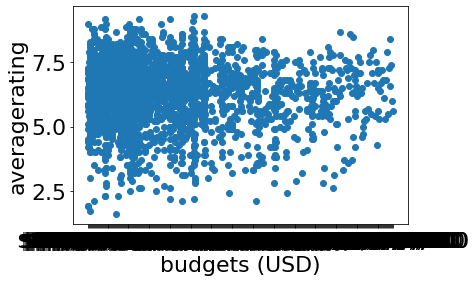

In [230]:
fig, ax = plt.subplots()
ax.scatter(x=df_budget_merged['production_budget'], y=df_budget_merged['averagerating'])
ax.set_xlabel('budgets (USD)')
ax.set_ylabel('averagerating')

## Adding Director Data to our Data Frame

In [231]:
df_directors = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            directors """, con)
df_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [232]:
df_person = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            persons """, con)
df_person.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [233]:
director_df = pd.read_sql("""
                            SELECT
                                d.movie_id, p.primary_name AS director_name
                            FROM 
                                directors AS d
                                INNER JOIN persons AS p
                                    ON d.person_id = p.person_id
                                """, con)
director_df.head()

,movie_id,director_name
0,tt0285252,Tony Vitale
1,tt0462036,Bill Haley
2,tt0835418,Jay Chandrasekhar
3,tt0835418,Jay Chandrasekhar
4,tt0878654,Albert Pyun


In [234]:
movie_df = df_budget_merged.merge(director_df, on='movie_id', how='inner')

In [235]:
movie_df.head()

,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,budgets(USD),dom_gross(USD),world_gross(USD),Estimated Profit,director_name
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706",45000000,0,73706,-44926294,Lawrence Kasanoff
1,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706",45000000,0,73706,-44926294,Lawrence Kasanoff
2,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706",45000000,0,73706,-44926294,Lawrence Kasanoff
3,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706",45000000,0,73706,-44926294,Lawrence Kasanoff
4,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706",45000000,0,73706,-44926294,Lawrence Kasanoff


## Cleaning New Updated Table

In [236]:
movie_clean_df = movie_df.drop_duplicates(subset='movie',keep='first')

In [237]:
movie_clean_df.head()

,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,budgets(USD),dom_gross(USD),world_gross(USD),Estimated Profit,director_name
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012","$45,000,000",$0,"$73,706",45000000,0,73706,-44926294,Lawrence Kasanoff
5,tt0326592,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996",200000,1109808,1165996,965996,Jed I. Goodman
8,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",25000000,720828,9313302,-15686698,Walter Salles
12,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183",91000000,58236838,187861183,96861183,Ben Stiller
14,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587",28000000,26017685,62108587,34108587,Scott Frank


In [238]:
movie_df['estimated_profit'] = movie_df['world_gross(USD)']-movie_df['budgets(USD)']
movie_clean_df['estimated_profit'] = movie_clean_df['world_gross(USD)']-movie_clean_df['budgets(USD)']

<ipython-input-238-9114c18305d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_clean_df['estimated_profit'] = movie_clean_df['world_gross(USD)']-movie_clean_df['budgets(USD)']


In [263]:
movie_clean_df.sort_values("estimated_profit", inplace=True)

<ipython-input-263-a37d04ded4e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_clean_df.sort_values("estimated_profit", inplace=True)


In [314]:
Top_500 = movie_clean_df.tail(500)
Top_100 = movie_clean_df.tail(100)
Top_250 = movie_clean_df.tail(250)
Top_50 = movie_clean_df.tail(50)

In [315]:
movie_clean_df.shape

(2123, 18)

In [241]:
Directors = (movie_clean_df['director_name'].unique())
Director_list = Directors.tolist()
Director_list


['Lawrence Kasanoff',
 'Jed I. Goodman',
 'Walter Salles',
 'Ben Stiller',
 'Scott Frank',
 'Colin Trevorrow',
 'Bruce Robinson',
 'Peter Farrelly',
 'Jerome Elston Scott',
 'Nathan Greno',
 'Andrew Stanton',
 'Prabhu Deva',
 'Jay Roach',
 'Joe Carnahan',
 'Ole Bornedal',
 'Shawn Levy',
 'Phillip Noyce',
 'Lee Unkrich',
 'Robert Rodriguez',
 'Steven Spielberg',
 'Chris Evans',
 'Radu Mihaileanu',
 'David F. Sandberg',
 'Chris Miller',
 'Patty Jenkins',
 'Brian Helgeland',
 'Ang Lee',
 'Breck Eisner',
 'Antoine Fuqua',
 'Joe Johnston',
 'Frank Miller',
 'David Worth',
 'Alexandre Aja',
 'Kenneth Lonergan',
 'Alex Garland',
 'Brett Ratner',
 'Raja Gosnell',
 'Simon West',
 'Ethan Coen',
 'Tony Scott',
 'Terrence Malick',
 'Peyton Reed',
 'Dominic Sena',
 'Sylvain White',
 'Bobby Farrelly',
 'Chris Sanders',
 "Chris D'Arienzo",
 'Anthony Hemingway',
 'Martin Scorsese',
 'Luke Greenfield',
 'Justin Chadwick',
 'Roger Kumble',
 'Elizabeth Allen Rosenbaum',
 'F. Javier Gutiérrez',
 'Brian Ro

## Creating a Dictionary of Directors with a list of their  profits in each of their films

In [242]:
directors_profits = dict(zip(movie_clean_df.director_name, movie_clean_df.estimated_profit))
directors_profits

{'Lawrence Kasanoff': -44926294,
 'Jed I. Goodman': 965996,
 'Walter Salles': -15686698,
 'Ben Stiller': 5348693,
 'Scott Frank': 34108587,
 'Colin Trevorrow': 3672318,
 'Bruce Robinson': -23455268,
 'Peter Farrelly': 299034439,
 'Jerome Elston Scott': -300000,
 'Nathan Greno': 326477240,
 'Andrew Stanton': 821215193,
 'Prabhu Deva': 13257000,
 'Jay Roach': 9907746,
 'Joe Carnahan': 56249176,
 'Ole Bornedal': 68925064,
 'Shawn Levy': 226756621,
 'Phillip Noyce': 160650494,
 'Lee Unkrich': 623008101,
 'Robert Rodriguez': -7000,
 'Steven Spielberg': 129748880,
 'Chris Evans': -2516062,
 'Radu Mihaileanu': -19523376,
 'David F. Sandberg': 290384865,
 'Chris Miller': 424987477,
 'Patty Jenkins': 671133378,
 'Brian Helgeland': 66470701,
 'Ang Lee': 500912003,
 'Breck Eisner': 50818912,
 'Antoine Fuqua': 113453132,
 'Joe Johnston': -7365642,
 'Frank Miller': -24349158,
 'David Worth': -1400000,
 'Alexandre Aja': 59660160,
 'Kenneth Lonergan': 69233867,
 'Alex Garland': -11929085,
 'Brett Rat

In [259]:
sorted(directors_profits, key=directors_profits.get, reverse=True)

['Atsushi Wada',
 'Pete Meads',
 'Anthony Russo',
 'James Wan',
 'J.A. Bayona',
 'Adam Green',
 'Christophe Gans',
 'Pierre Coffin',
 'Joss Whedon',
 'Brad Bird',
 'F. Gary Gray',
 'Kyle Balda',
 'Ryan Fleck',
 'Jake Kasdan',
 'Jared Bush',
 'Gareth Edwards',
 'Andrew Stanton',
 'Chris Renaud',
 'Jun Falkenstein',
 'Tim Miller',
 'Peter Jackson',
 'Artie Mandelberg',
 'David Leitch',
 'Patty Jenkins',
 'Andy Muschietti',
 'David Slade',
 'Lee Unkrich',
 'Zack Snyder',
 'James Gunn',
 'Gary Ross',
 'Alfonso Cuarón',
 'Sam Mendes',
 'Robert Stromberg',
 'Christophe Lourdelet',
 'Joachim Rønning',
 'Ridley Scott',
 'Dan Scanlon',
 'Sam Taylor-Johnson',
 'Marc Webb',
 'Ang Lee',
 'Tarô Ohtani',
 'Alan Taylor',
 'Peyton Reed',
 'Kyle Lawrence',
 'Ron Clements',
 'Don Hall',
 'Christopher H. Baum',
 'Genndy Tartakovsky',
 'David Yates',
 'Jon Favreau',
 'Barry Sonnenfeld',
 'Guy Ritchie',
 'Chris Miller',
 'Luc Besson',
 'George Anton',
 'Damien Chazelle',
 'Rahim Behboodi Far',
 'Phil Lord'

In [244]:
from operator import itemgetter
top_profits5 = dict(sorted(directors_profits.items(), key = itemgetter(1), reverse = True)[:5])
top_profits10 = dict(sorted(directors_profits.items(), key = itemgetter(1), reverse = True)[:10])

In [245]:
top_profits5

{'Atsushi Wada': 2351345279,
 'Pete Meads': 2008208395,
 'Anthony Russo': 1748134200,
 'James Wan': 1328722794,
 'J.A. Bayona': 1135772799}

In [246]:
top_profits10

{'Atsushi Wada': 2351345279,
 'Pete Meads': 2008208395,
 'Anthony Russo': 1748134200,
 'James Wan': 1328722794,
 'J.A. Bayona': 1135772799,
 'Adam Green': 1122469910,
 'Christophe Gans': 1099199706,
 'Pierre Coffin': 1086336173,
 'Joss Whedon': 1072413963,
 'Brad Bird': 1042520711}

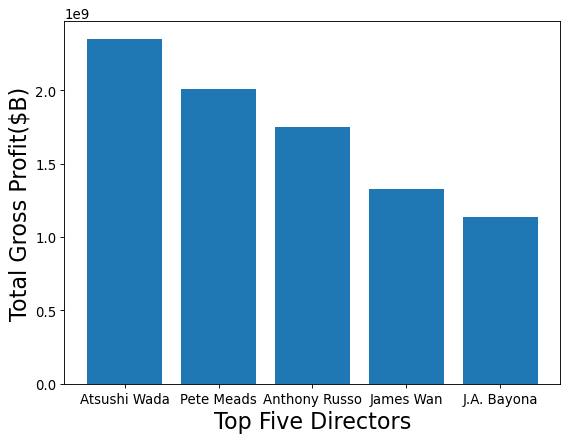

In [257]:
from matplotlib.pyplot import figure
keys = top_profits5.keys()
values = top_profits5.values()
figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 12})
plt.bar(keys, values)
plt.xlabel('Top Five Directors', fontsize=20)
plt.ylabel('Total Gross Profit($B)', fontsize=20)
plt.show()



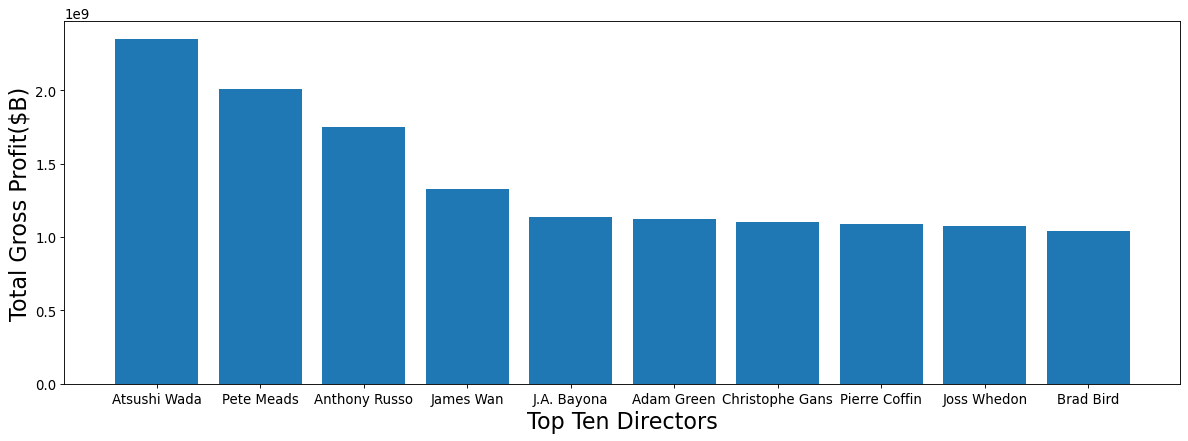

In [269]:
from matplotlib.pyplot import figure
keys = top_profits10.keys()
values = top_profits10.values()
figure(figsize=(18, 6), dpi=80)
plt.rcParams.update({'font.size': 12})
plt.bar(keys, values)
plt.xlabel('Top Ten Directors', fontsize=20)
plt.ylabel('Total Gross Profit($B)', fontsize=20)
plt.show()

In [297]:
Top_500

,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,budgets(USD),dom_gross(USD),world_gross(USD),Estimated Profit,director_name,estimated_profit
1239,tt1254978,Daylight,2010,75.0,"Crime,Horror,Thriller",5.1,201,95,"Dec 6, 1996","$80,000,000","$32,908,290","$158,908,290",80000000,32908290,158908290,78908290,David Barker,78908290
411,tt0881320,Sanctum,2011,108.0,"Adventure,Drama,Thriller",5.9,51318,45,"Feb 4, 2011","$30,000,000","$23,209,310","$108,957,098",30000000,23209310,108957098,78957098,Alister Grierson,78957098
7221,tt5083738,The Favourite,2018,119.0,"Biography,Drama,History",7.6,116011,39,"Nov 23, 2018","$15,000,000","$34,366,783","$94,113,929",15000000,34366783,94113929,79113929,Yorgos Lanthimos,79113929
7368,tt5846676,The Saint,2016,96.0,Drama,6.4,516,68,"Apr 4, 1997","$90,000,000","$61,363,304","$169,400,000",90000000,61363304,169400000,79400000,Andrius Blazevicius,79400000
7017,tt4501244,Why Him?,2016,111.0,Comedy,6.2,89628,62,"Dec 23, 2016","$38,000,000","$60,323,786","$117,425,156",38000000,60323786,117425156,79425156,John Hamburg,79425156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,tt2820852,Furious 7,2015,137.0,"Action,Crime,Thriller",7.2,335074,67,"Apr 3, 2015","$190,000,000","$353,007,020","$1,518,722,794",190000000,353007020,1518722794,1328722794,James Wan,1328722794
16,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864",215000000,652270625,1648854864,1433854864,Colin Trevorrow,1433854864
6876,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,7,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200",300000000,678815482,2048134200,1748134200,Anthony Russo,1748134200
5699,tt2495766,Titanic,2012,NaN,Adventure,6.2,20,43,"Dec 19, 1997","$200,000,000","$659,363,944","$2,208,208,395",200000000,659363944,2208208395,2008208395,Pete Meads,2008208395


In [286]:
top_500_appearances = Top_500.director_name.value_counts().head(10).tolist()

In [291]:
Top_500.director_name.value_counts().head(10)

Steven Spielberg     6
Jon M. Chu           5
Ridley Scott         5
James Wan            4
Mike Mitchell        4
Christopher Nolan    4
James DeMonaco       3
Tom McGrath          3
Shawn Levy           3
Tim Burton           3
Name: director_name, dtype: int64

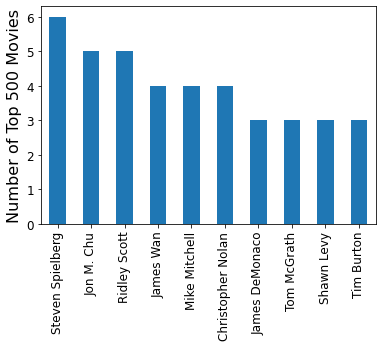

In [323]:
Top_500['director_name'].value_counts().head(10).plot(kind='bar');
plt.ylabel('Number of Top 500 Movies', fontsize=16)
plt.show()

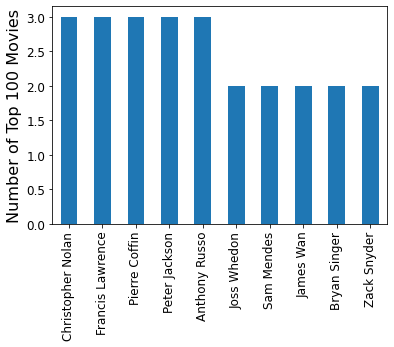

In [324]:
Top_100['director_name'].value_counts().head(10).plot(kind='bar');
plt.ylabel('Number of Top 100 Movies', fontsize=16)
plt.show()